In [66]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [67]:
# Data loading and preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


In [68]:
# Define the feedforward neural network
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [69]:
input_size = 32 * 32 * 3  # Input image size (CIFAR-10 images are 32x32 with 3 channels)
hidden_size = 64  # Number of neurons in the hidden layer
output_size = 10  # Number of output classes


In [70]:
# Create an instance of the network
model = Net(input_size, hidden_size, output_size)

# Define loss criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [71]:
# Training loop
epochs = 10
accuracy_per_epoch = []

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Evaluate the model on the validation set
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    accuracy_per_epoch.append(accuracy)
    print(f'Accuracy on validation set for epoch {epoch + 1}: {accuracy:.2f}%')

print('Finished Training')


Accuracy on validation set for epoch 1: 36.20%
Accuracy on validation set for epoch 2: 39.21%
Accuracy on validation set for epoch 3: 41.36%
Accuracy on validation set for epoch 4: 42.88%
Accuracy on validation set for epoch 5: 44.13%
Accuracy on validation set for epoch 6: 44.78%
Accuracy on validation set for epoch 7: 45.66%
Accuracy on validation set for epoch 8: 46.59%
Accuracy on validation set for epoch 9: 47.00%
Accuracy on validation set for epoch 10: 47.50%
Finished Training


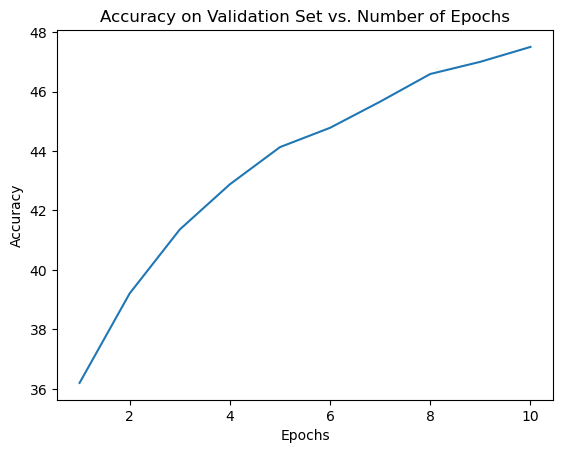

In [72]:
# Plot accuracy on validation set vs. number of epochs
plt.plot(range(1, epochs + 1), accuracy_per_epoch)
plt.title('Accuracy on Validation Set vs. Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [73]:
# Calculate the accuracy of the network on the test set
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10,000 test images: {accuracy:.2f}%')


Accuracy of the network on the 10,000 test images: 47.50%


In [74]:
# # Calculate the accuracy of each class
# class_correct = [0] * 10
# class_total = [0] * 10

# with torch.no_grad():
#     for data in testloader:
#         images, labels = data
#         outputs = model(images)
#         _, predicted = torch.max(outputs.data, 1)
#         c = (predicted == labels).squeeze()
        
#         for i in range(batch_size):
#             label = labels[i]
#             class_correct[label] += c[i].item()
#             class_total[label] += 1

# # Print accuracy for each class
# for i in range(10):
#     accuracy = 100 * class_correct[i] / class_total[i]
#     print(f'Accuracy of {classes[i]}: {accuracy:.2f}%')
